Head of the CPI Data:
                  CPI_Value
observation_date           
1947-01-01            21.48
1947-02-01            21.62
1947-03-01            22.00
1947-04-01            22.00
1947-05-01            21.95


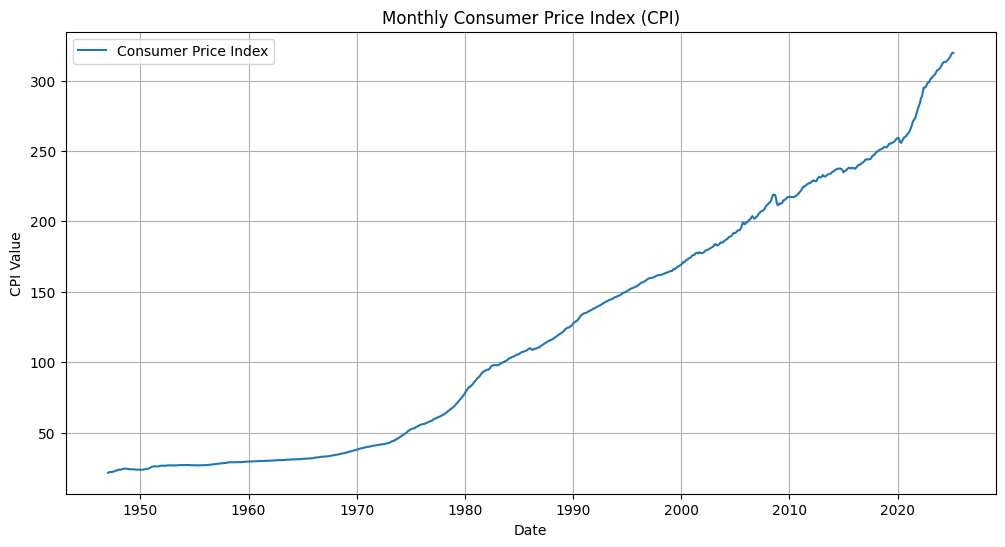

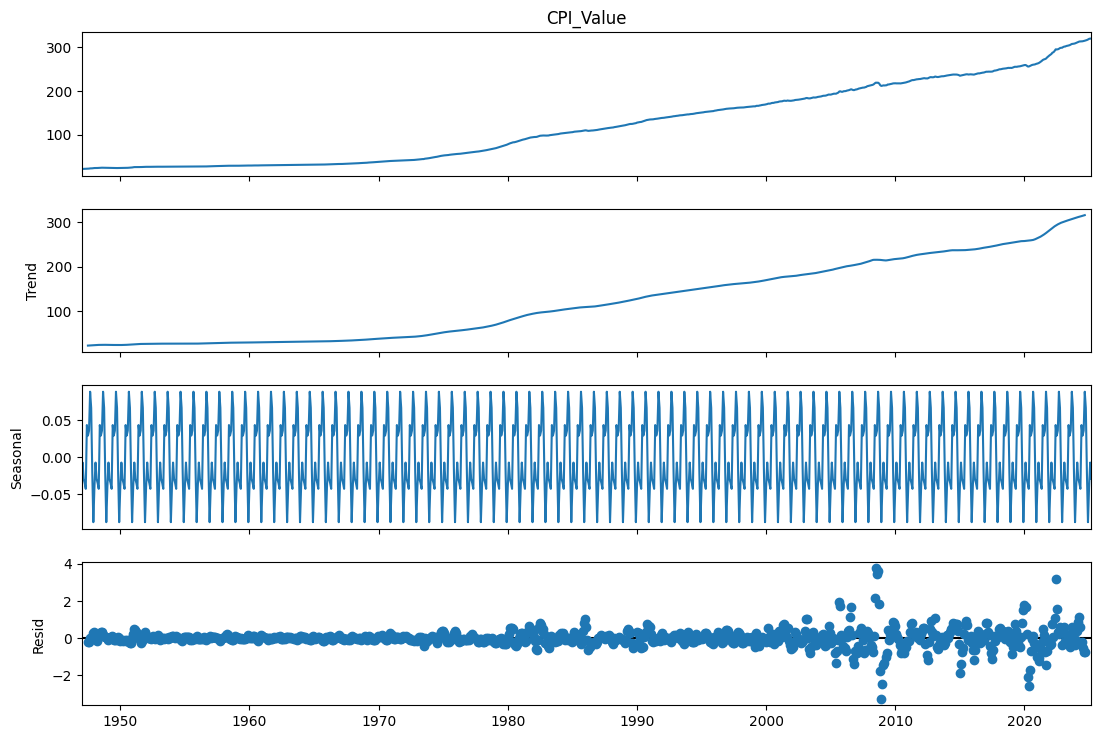


Could not use auto_arima: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject
Using manual ARIMA parameters instead

Model Summary:
                                    SARIMAX Results                                     
Dep. Variable:                        CPI_Value   No. Observations:                  751
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -165.373
Date:                          Mon, 14 Apr 2025   AIC                            340.746
Time:                                  13:13:21   BIC                            363.766
Sample:                              01-01-1947   HQIC                           349.623
                                   - 07-01-2009                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------

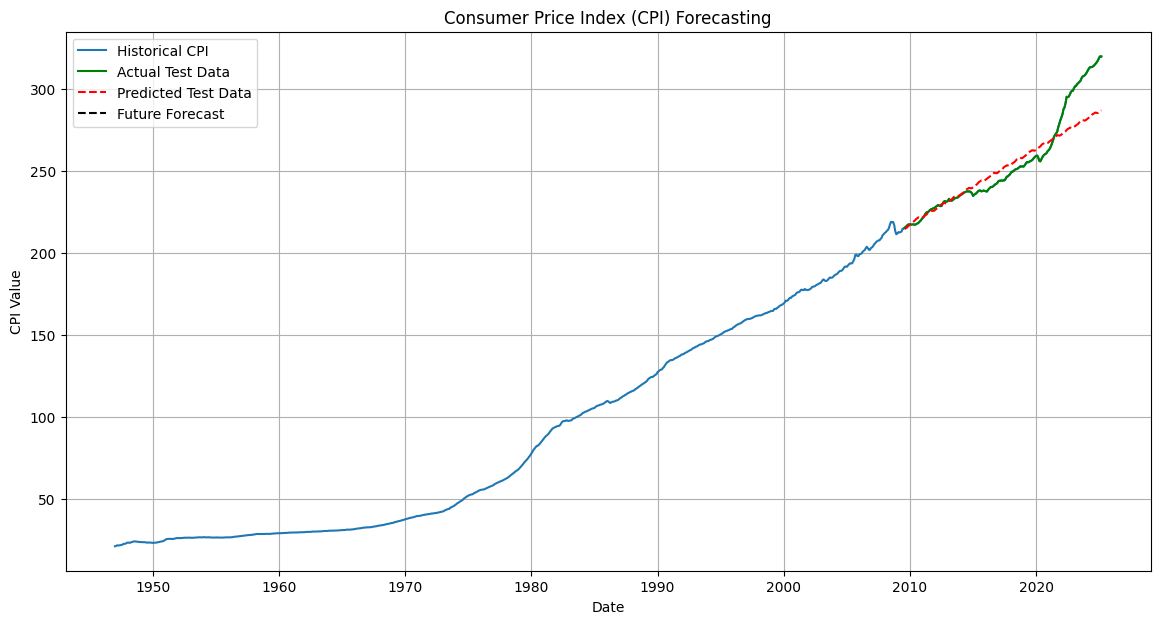


Future CPI Forecast:
           Forecasted_CPI
2025-03-01            NaN
2025-04-01            NaN
2025-05-01            NaN
2025-06-01            NaN
2025-07-01            NaN
2025-08-01            NaN
2025-09-01            NaN
2025-10-01            NaN
2025-11-01            NaN
2025-12-01            NaN
2026-01-01            NaN
2026-02-01            NaN
2026-03-01            NaN
2026-04-01            NaN
2026-05-01            NaN
2026-06-01            NaN
2026-07-01            NaN
2026-08-01            NaN
2026-09-01            NaN
2026-10-01            NaN
2026-11-01            NaN
2026-12-01            NaN
2027-01-01            NaN
2027-02-01            NaN

Analysis complete. Remember to complete the Excel and R parts.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

# --- 1. Data Preparation ---
# Load the CPI data from your local CSV file
file_path = 'C:/Users/USER/Downloads/CPIAUCSL.csv'  # Make sure this is in your working directory

try:
    df = pd.read_csv(file_path, parse_dates=['observation_date'], index_col='observation_date')
    df.rename(columns={'CPIAUCSL': 'CPI_Value'}, inplace=True)
    df = df.dropna()
    
    print("Head of the CPI Data:")
    print(df.head())
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    exit()
except Exception as e:
    print(f"Error loading data: {e}")
    exit()

# Visualize the time series
plt.figure(figsize=(12, 6))
plt.plot(df['CPI_Value'], label='Consumer Price Index')
plt.title('Monthly Consumer Price Index (CPI)')
plt.xlabel('Date')
plt.ylabel('CPI Value')
plt.legend()
plt.grid(True)
plt.show()

# Decompose the time series
try:
    decomposition = seasonal_decompose(df['CPI_Value'], model='additive', period=12)
    fig = decomposition.plot()
    fig.set_size_inches(12, 8)
    plt.show()
except ValueError as e:
    print(f"Could not decompose series: {e}")

# --- 2. Model Selection ---
# Try to use auto_arima if available, otherwise use manual parameters
try:
    from pmdarima import auto_arima
    print("\nFinding best ARIMA model using auto_arima...")
    auto_arima_model = auto_arima(df['CPI_Value'], seasonal=True, m=12,
                                suppress_warnings=True, stepwise=True, trace=True)
    print("\nBest ARIMA model found by auto_arima:")
    print(auto_arima_model.summary())
    best_order = auto_arima_model.order
    best_seasonal_order = auto_arima_model.seasonal_order
except Exception as e:
    print(f"\nCould not use auto_arima: {e}")
    print("Using manual ARIMA parameters instead")
    # These are reasonable defaults for economic data
    best_order = (1,1,1)
    best_seasonal_order = (1,1,1,12)

# --- 3. Forecasting ---
# Split data
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Train model
try:
    model = ARIMA(train['CPI_Value'], order=best_order, seasonal_order=best_seasonal_order)
    model_fit = model.fit()
    
    print("\nModel Summary:")
    print(model_fit.summary())
    
    # Predictions
    predictions = model_fit.predict(start=len(train), end=len(df)-1)
    mse = mean_squared_error(test['CPI_Value'], predictions)
    print(f'\nMean Squared Error on Test Set: {mse:.2f}')
    
    # Future forecast
    future_steps = 24
    forecast = model_fit.forecast(steps=future_steps)
    forecast_index = pd.date_range(start=df.index[-1], periods=future_steps, freq='MS')
    forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecasted_CPI'])
    
    # Visualization
    plt.figure(figsize=(14, 7))
    plt.plot(df['CPI_Value'], label='Historical CPI')
    plt.plot(test.index, test['CPI_Value'], 'g-', label='Actual Test Data')
    plt.plot(test.index, predictions, 'r--', label='Predicted Test Data')
    plt.plot(forecast_df.index, forecast_df['Forecasted_CPI'], 'k--', label='Future Forecast')
    plt.title('Consumer Price Index (CPI) Forecasting')
    plt.xlabel('Date')
    plt.ylabel('CPI Value')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    print("\nFuture CPI Forecast:")
    print(forecast_df)
    
except Exception as e:
    print(f"\nError in ARIMA modeling: {e}")
    print("Try different parameters or check your data")

print("\nAnalysis complete. Remember to complete the Excel and R parts.")